<a href="https://colab.research.google.com/github/BarriosJP/JP-FCEN-UBA/blob/main/Barrios_Villarreal_Juan_Pablo_Proyecto_Final_Integrador_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as m
import numpy as np

#**Etapa 1: Recopilacion y Preparacion de Datos**

##1) Cargar los sets de datos como DataFrames.

In [ ]:
ruta_clientes= "https://docs.google.com/spreadsheets/d/e/2PACX-1vSXiNclDDZxL8qlvu0uKNnXJcQjK13FB0vMFodj3gXf7CjkpuCJRblYsVJvILoPYdsqcs8GM9OexyMC/pub?gid=2089534450&single=true&output=csv"
df_clientes= pd.read_csv(ruta_clientes)
df_clientes

,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65
...,...,...,...,...,...
562,563,Dione Forsyde,29,Posadas,26757.73
563,564,Fleming Gow,39,Santa Fe,43674.96
564,565,Jewelle Mabbett,33,Córdoba,30522.64
565,566,Lauri Munns,23,Resistencia,31259.14


In [ ]:
ruta_marketing= "https://docs.google.com/spreadsheets/d/e/2PACX-1vSGM81DJMHaruDgJQ8LrMEJ9oGQXB7pKF1ndYHx0UDDgqZNGCVp95XxwHDqlvbe79jnz3nGWA4XaIG5/pub?gid=1603483343&single=true&output=csv"
df_marketing= pd.read_csv(ruta_marketing)
df_marketing

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024
...,...,...,...,...,...,...
85,70,Aspiradora,TV,3.06,13/12/2024,29/12/2024
86,89,Televisor,TV,4.98,13/12/2024,8/2/2025
87,68,Rincón de plantas,TV,5.81,17/12/2024,14/2/2025
88,33,Secadora,Email,3.80,20/12/2024,7/1/2025


In [ ]:
ruta_ventas="https://docs.google.com/spreadsheets/d/e/2PACX-1vSjN-GsAwfemQKnRKUnUt6fEjcv-8QW4oBssTXwPzGgZxFh2O3i0y5VA8aYdHFLRPJRUdPAim2nP7SF/pub?gid=7210291&single=true&output=csv"
df_ventas= pd.read_csv(ruta_ventas)
df_ventas

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos
...,...,...,...,...,...,...
3030,1837,Horno eléctrico,$104.12,9.0,30/12/2024,Electrodomésticos
3031,2276,Laptop,$85.27,9.0,30/12/2024,Electrónica
3032,2696,Laptop,$107.81,4.0,30/12/2024,Electrónica
3033,2913,Smartphone,$99.85,7.0,30/12/2024,Electrónica


##2) Realizar un script que calcule las ventas mensuales utilizando variables y operadores.

Para la realizacion de este script, asigno en letras el mes asociado a cada fecha de venta, para luego agrupar la suma total de ventas por mes.

Para ello, considero primeramente establecer que la columna de fechas este en formato *datetime*, de manera que, al utilizar la serie dt.month, pueda extraer y asociar (o *mapear*) los valores numericos de los meses con los mismos conteniendos en el diccionario 'mes'.

Por otra parte, quito el signo '$' de la columna precio (renombrada a precio_venta), a fin de poder cambiar su tipo de estructura a *float*, y así poder manipularla aritmeticamente en la variable -ventasXmes-.

A fin de que cada mes quede ordenado de manera anual, defino a mi nueva columna 'mes' como aquella que le da un orden categorico (asociado a los valores numericos de mi diccionario del mismo nombre) a mi dataframe.

In [ ]:
df_ventas['fecha_venta'] = pd.to_datetime(df_ventas['fecha_venta'], format= '%d/%m/%Y') #No respeta el formato, quedó yyyy-mm-dd .

mes= { 1:'enero', 2: 'febrero', 3: 'marzo', 4: 'abril', 5: 'mayo', 6: 'junio', 7: 'julio', 8: 'agosto', 9: 'septiembre', 10: 'octubre', 11: 'noviembre', 12: 'diciembre'}

df_ventas['mes'] = df_ventas['fecha_venta'].dt.month.map(mes)
df_ventas['mes'] = pd.Categorical(df_ventas['mes'], categories = list(mes.values()), ordered=True)

df_ventas= df_ventas.rename(columns={'precio': 'precio_venta'})
df_ventas['precio_venta'] = df_ventas['precio_venta'].str.replace('$','')
df_ventas['precio_venta'] = df_ventas['precio_venta'].astype(float)

ventasXmes= df_ventas.groupby('mes', observed=False) ['precio_venta'].sum()

print(df_ventas)
print('Total de ventas por mes:')
ventasXmes

      id_venta                producto  precio_venta  cantidad fecha_venta  \
0          792       Cuadro decorativo         69.94       5.0  2024-01-02   
1          811         Lámpara de mesa        105.10       5.0  2024-01-02   
2         1156                Secadora         97.96       3.0  2024-01-02   
3         1372                Heladera        114.35       8.0  2024-01-02   
4         1546                Secadora        106.21       4.0  2024-01-02   
...        ...                     ...           ...       ...         ...   
3030      1837         Horno eléctrico        104.12       9.0  2024-12-30   
3031      2276                  Laptop         85.27       9.0  2024-12-30   
3032      2696                  Laptop        107.81       4.0  2024-12-30   
3033      2913              Smartphone         99.85       7.0  2024-12-30   
3034      2930  Consola de videojuegos         55.47       6.0  2024-12-30   

              categoria        mes  
0            Decoración   

,precio_venta
mes,
enero,20097.34
febrero,18578.62
marzo,20078.93
abril,23125.96
mayo,21445.87
junio,16835.01
julio,18184.12
agosto,19226.95
septiembre,17793.47


*Nota: Al correr este codigo por segunda vez, notará que devuelve error, pues intentará rehacer procesos irrepetibles por el formato en que esta definido el codigo de la celda.
Para volver a correrlo, correr nuevamente primero la celda que carga el dataframe de ventas original.*

##3) **Estructuras de datos:** Desarrollar un programa que almacene los datos de ventas (producto, precio, cantidad). Decidir si conviene utilizar diccionarios o listas.

Aquí opte por definir una funcion que, a partir de un diccionario previamente creado, modifique sus claves:valores y las concatene a mi base de datos, de manera que cada vez que use tal funcion, ésta utilizara a ese diccionario como medio para agregar filas al dataframe.

In [ ]:
max(df_ventas['id_venta'])

3000

In [ ]:
adding_df= {'id_venta': 0, 'producto': '', 'precio_venta': 0, 'cantidad': 0.0}

def ventas_add (producto, precio, cantidad):
  global df_ventas
  adding_df['producto'] = producto
  adding_df['precio_venta'] = float(precio)
  adding_df['cantidad'] = int(cantidad)
  adding_df['id_venta'] = int(max(df_ventas['id_venta'])+1)
  df_ventas = pd.concat([df_ventas, pd.DataFrame([adding_df])])
  print("¡Información de venta agregada exitosamente!")


In [ ]:
ventas_add ('Laptop', 105.5, 5)

¡Información de venta agregada exitosamente!


In [ ]:
df_ventas

,id_venta,producto,precio_venta,cantidad,fecha_venta,categoria,mes
0,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración,enero
1,811,Lámpara de mesa,105.10,5.0,2024-01-02,Decoración,enero
2,1156,Secadora,97.96,3.0,2024-01-02,Electrodomésticos,enero
3,1372,Heladera,114.35,8.0,2024-01-02,Electrodomésticos,enero
4,1546,Secadora,106.21,4.0,2024-01-02,Electrodomésticos,enero
...,...,...,...,...,...,...,...
3031,2276,Laptop,85.27,9.0,2024-12-30,Electrónica,diciembre
3032,2696,Laptop,107.81,4.0,2024-12-30,Electrónica,diciembre
3033,2913,Smartphone,99.85,7.0,2024-12-30,Electrónica,diciembre
3034,2930,Consola de videojuegos,55.47,6.0,2024-12-30,Electrónica,diciembre


Reseteo el indexado de mi dataframe ya que ahora debe considerar mi nueva fila agregada, y corroboro...

In [ ]:
df_ventas=df_ventas.reset_index(drop=True)
df_ventas[df_ventas['id_venta']== 3001]

,id_venta,producto,precio_venta,cantidad,fecha_venta,categoria,mes
3035,3001,Laptop,105.5,5.0,NaT,NaN,NaN


Debido a que el ejercicio no me lo pide, opte por no agregar los datos de las columnas faltanes, pero estas pueden ser agregadas a futuro, dentro de la funcion o de manera individual.

##4) **Introduccion a Pandas**: Realizar un analisis exploratorio inicial de los DataFrames.

In [ ]:
df_ventas.head()

,id_venta,producto,precio_venta,cantidad,fecha_venta,categoria,mes
0,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración,enero
1,811,Lámpara de mesa,105.10,5.0,2024-01-02,Decoración,enero
2,1156,Secadora,97.96,3.0,2024-01-02,Electrodomésticos,enero
3,1372,Heladera,114.35,8.0,2024-01-02,Electrodomésticos,enero
4,1546,Secadora,106.21,4.0,2024-01-02,Electrodomésticos,enero


In [ ]:
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3036 entries, 0 to 3035
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_venta      3036 non-null   int64         
 1   producto      3036 non-null   object        
 2   precio_venta  3034 non-null   float64       
 3   cantidad      3034 non-null   float64       
 4   fecha_venta   3035 non-null   datetime64[ns]
 5   categoria     3035 non-null   object        
 6   mes           3035 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 145.8+ KB


In [ ]:
df_ventas.describe()

,id_venta,precio_venta,cantidad,fecha_venta
count,3036.000000,3034.000000,3034.000000,3035
mean,1500.345850,75.298991,6.496045,2024-06-25 20:51:09.785832192
min,1.000000,26.000000,1.000000,2024-01-02 00:00:00
25%,748.750000,50.030000,3.000000,2024-03-28 00:00:00
50%,1502.500000,75.285000,7.000000,2024-06-21 00:00:00
75%,2250.250000,100.055000,9.000000,2024-09-25 00:00:00
max,3001.000000,124.970000,12.000000,2024-12-30 00:00:00
std,866.750903,28.735163,3.456787,NaN


-------------------------------------------------

In [ ]:
df_marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


In [ ]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [ ]:
df_marketing.describe()

,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


-------------------------------------------------

In [ ]:
df_clientes.head()

,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


In [ ]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB


In [ ]:
df_clientes.describe()

,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


##5) **Calidad de Datos**: Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.

In [ ]:
df_ventas.isnull().sum()

,0
id_venta,0
producto,0
precio_venta,2
cantidad,2
fecha_venta,1
categoria,1
mes,1


Aca se puede observar que los 3 1's de las columnas 'fecha_venta', 'categoria' y 'mes' son aquellos de la nueva fila agregada a la cual no le asigne datos a ninguna de estas tres columnas.

Pero ademas se observa que hay al menos dos filas mas que no tienen datos asociados a las columnas 'precio_venta' y 'cantidad'.

In [ ]:
df_ventas.duplicated().sum()

np.int64(35)

Por otro lado, aca se observa que en el dataframe de ventas hay, de base, 35 elementos duplicados.

In [ ]:
df_marketing.isnull().sum()

,0
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


In [ ]:
df_marketing.duplicated().sum()

np.int64(0)

In [ ]:
df_clientes.isnull().sum()

,0
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


In [ ]:
df_clientes.duplicated().sum()

np.int64(0)

#**Etapa 2: Preprocesamiento y Limplieza de Datos**

##1) **Limpieza de Datos**: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.

Como al principio se trabajó bastante el dataframe de ventas, ahora queda, por una parte, eliminar duplicados y verificar.

In [ ]:
df_ventas= df_ventas.drop_duplicates()
df_ventas.duplicated().sum()

np.int64(0)

Y por otra parte, corregir los valores nulos de las columnas 'precio_venta' y 'cantidad'.

In [ ]:
df_ventas[df_ventas['precio_venta'].isnull() == True]

,id_venta,producto,precio_venta,cantidad,fecha_venta,categoria,mes
136,627,Elementos de cerámica,NaN,NaN,2024-01-17,Decoración,enero
139,2171,Parlantes Bluetooth,NaN,NaN,2024-01-17,Electrónica,enero


Como ambos pares de datos faltantes corresponden a las mismas dos filas, se procede a rellenarlas con la media asociada a cada columna.

In [ ]:
df_ventas['precio_venta'] = df_ventas['precio_venta'].fillna(df_ventas['precio_venta'].mean())
df_ventas['cantidad'] = df_ventas['cantidad'].fillna(int(df_ventas['cantidad'].mean()))

Corroboro...

In [ ]:
df_ventas[(df_ventas['id_venta'] == 627) | (df_ventas['id_venta'] == 2171)]

,id_venta,producto,precio_venta,cantidad,fecha_venta,categoria,mes
136,627,Elementos de cerámica,75.30139,6.0,2024-01-17,Decoración,enero
139,2171,Parlantes Bluetooth,75.30139,6.0,2024-01-17,Electrónica,enero


In [ ]:
df_ventas.isnull().sum()

,0
id_venta,0
producto,0
precio_venta,0
cantidad,0
fecha_venta,1
categoria,1
mes,1


Se observa que se mantienen los valores asociados a la linea agregada mediante la funcion -ventas add-, que agrega nuevas filas al dataset. Esto puede resolverse, preferentemente, mediante la adicion o correccion posterior asociada a ese registro de venta, pero es, en este caso, de baja prioridad, en tanto esta no afecta al conteo asociado al rendimiento solicitado.

##2) **Transformacion de Datos**: Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.

*(Nota: Se definen como productos de alto rendimiento a aquellos que se encuentren en el top 25% de sus respectivas columnas consideradas.)*

In [ ]:
df_ventas['precio_venta'].describe() #Uso del 75% para arriba

,precio_venta
count,3001.00000
mean,75.30139
std,28.72693
min,26.00000
25%,50.06000
50%,75.30000
75%,100.07000
max,124.97000


In [ ]:
df_ventas['cantidad'].describe() # Uso del 75% para arriba

,cantidad
count,3001.000000
mean,6.501833
std,3.453512
min,1.000000
25%,3.000000
50%,7.000000
75%,9.000000
max,12.000000


In [ ]:
ventas_precio_top25 = df_ventas['precio_venta'].quantile(0.75)
ventas_cantidad_top25 = df_ventas['cantidad'].quantile(0.75)
df_alto_rendimiento = df_ventas[(df_ventas['precio_venta'] >= ventas_precio_top25) & (df_ventas['cantidad'] >= ventas_cantidad_top25)]
df_alto_rendimiento

,id_venta,producto,precio_venta,cantidad,fecha_venta,categoria,mes
19,882,Cuadro decorativo,101.92,9.0,2024-01-04,Decoración,enero
22,1971,Freidora eléctrica,122.25,11.0,2024-01-04,Electrodomésticos,enero
25,606,Cortinas,106.66,11.0,2024-01-05,Decoración,enero
27,1362,Heladera,109.49,11.0,2024-01-05,Electrodomésticos,enero
32,2180,Consola de videojuegos,102.57,9.0,2024-01-06,Electrónica,enero
...,...,...,...,...,...,...,...
2967,1652,Heladera,101.22,11.0,2024-12-22,Electrodomésticos,diciembre
2992,1996,Secadora,113.87,9.0,2024-12-25,Electrodomésticos,diciembre
3012,1274,Aspiradora,124.15,9.0,2024-12-28,Electrodomésticos,diciembre
3029,1583,Microondas,105.36,9.0,2024-12-30,Electrodomésticos,diciembre


##3) **Agregacion:** Resumir las ventas por categoria de producto y analizar los ingresos generados.

In [ ]:
grupo_ventas = df_ventas.groupby('categoria')['precio_venta'].sum()
grupo_ventas

,precio_venta
categoria,
Decoración,74173.30139
Electrodomésticos,76520.96000
Electrónica,75179.71139


Se observa una ganancia ligeramente mayor en la categoria Electrodomesticos, mientras que la minima ganancia esta asociada a la categoría Decoración.

##4) **Integracion de Datos:** Combinar los sets de datos de ventas y marketing para obtener una vision mas amplia de las tendencias.

El criterio utilizado en este punto fue el de mantener las columnas del dataset de ventas, y combinarlo con selectas del dataset de marketing (utilizando como criterio ancla la columna 'producto' repetida en ambos dataset), de modo tal que enriqueza la informacion ya otorgada por el primero, sin sobreescribir ni exceder en ello que provoque un efecto contrario.

In [ ]:
df_combinado= pd.merge(df_ventas,df_marketing, on='producto', how='left')
df_combinado= df_combinado.sort_values(by=['id_venta','costo'], ascending=[True, False]) #Ayudado con chatgpt
df_combinado= df_combinado.drop_duplicates(subset='id_venta', keep='last') #Elijo mantener el ultimo, que es la cota de costo minimo para ese producto
df_combinado = df_combinado.drop(columns=['fecha_inicio'])
df_combinado = df_combinado.drop(columns=['fecha_fin'])
df_combinado = df_combinado.rename(columns={'costo': 'costo_minimo'})
df_combinado

,id_venta,producto,precio_venta,cantidad,fecha_venta,categoria,mes,id_campanha,canal,costo_minimo
2801,1,Lámpara de mesa,82.25,8.0,2024-04-17,Decoración,abril,62,TV,4.51
1464,2,Cuadro decorativo,106.12,3.0,2024-02-27,Decoración,febrero,1,RRSS,5.27
6638,3,Espejo decorativo,51.32,1.0,2024-09-22,Decoración,septiembre,23,RRSS,4.75
7568,4,Jarrón decorativo,64.12,12.0,2024-11-01,Decoración,noviembre,75,TV,4.10
7581,5,Alfombra,70.10,4.0,2024-11-02,Decoración,noviembre,58,Email,4.25
...,...,...,...,...,...,...,...,...,...,...
4909,2997,SmartWatch,47.71,3.0,2024-07-11,Electrónica,julio,55,Email,4.59
7099,2998,Proyector,115.84,10.0,2024-10-10,Electrónica,octubre,37,Email,3.22
3637,2999,Consola de videojuegos,52.08,4.0,2024-05-17,Electrónica,mayo,20,RRSS,3.16
5251,3000,Parlantes Bluetooth,78.55,11.0,2024-07-25,Electrónica,julio,54,Email,2.95


#**Etapa 3: Análisis de Datos**

Para el analisis de los datos del dataframe Ventas creo una columna, 'ventas_totales', que me de el valor de venta total de cada operacion multiplicando cada item de la columna 'precio_venta' por cada item de la columna 'cantidad', a fin de utilizarla en los diferentes analisis graficos posteriores.

In [ ]:
df_ventas['ventas_totales']= df_ventas['precio_venta']*df_ventas['cantidad']

In [ ]:
df_ventas.head()

,id_venta,producto,precio_venta,cantidad,fecha_venta,categoria,mes,ventas_totales
0,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración,enero,349.70
1,811,Lámpara de mesa,105.10,5.0,2024-01-02,Decoración,enero,525.50
2,1156,Secadora,97.96,3.0,2024-01-02,Electrodomésticos,enero,293.88
3,1372,Heladera,114.35,8.0,2024-01-02,Electrodomésticos,enero,914.80
4,1546,Secadora,106.21,4.0,2024-01-02,Electrodomésticos,enero,424.84


In [ ]:
#1- Estadistica descriptiva
estadisticas = df_ventas[['precio_venta','cantidad','ventas_totales']].describe()
print('Resumen estadistico de variables numericas:')
print(estadisticas)

Resumen estadistico de variables numericas:
       precio_venta     cantidad  ventas_totales
count    3001.00000  3001.000000     3001.000000
mean       75.30139     6.501833      489.345097
std        28.72693     3.453512      334.116766
min        26.00000     1.000000       26.300000
25%        50.06000     3.000000      221.160000
50%        75.30000     7.000000      418.100000
75%       100.07000     9.000000      709.200000
max       124.97000    12.000000     1488.120000


Se observa que, para este año de ventas, el promedio de cantidad de productos por operacion de venta se asienta en 6.50, valiendo ARS 75.30 cada producto, para una suma de ARS 489.35 promedio por operación.
Ademas, se observó que el valor de venta minimo para una operacion fue ARS 26.30 y el maximo ARS 1488.12.

In [ ]:
#2- EDA - Agrupado por producto
ventas_promedio_producto = df_ventas.groupby('producto')[['precio_venta','ventas_totales']].mean().sort_values(by='ventas_totales', ascending=False)
print('Productos con mayor venta promedio:')
print(ventas_promedio_producto.head())

Productos con mayor venta promedio:
                   precio_venta  ventas_totales
producto                                       
Cuadro decorativo     74.578000      542.976000
Microondas            79.176000      537.502889
Heladera              74.127708      536.183333
Smartphone            81.398416      535.964752
Secadora              73.338900      521.154500


Mientras que el valor promedio de venta por producto maximo corresponde al 'Smartphone', se observó que el promedio maximo de ventas totales corresponde al producto 'Cuadro decorativo'.

In [ ]:
#3- Correlacion entre variables
correlacion = df_ventas[['precio_venta','cantidad','ventas_totales']].corr()
print('\nMatriz de correlacion:')
print(correlacion)


Matriz de correlacion:
                precio_venta  cantidad  ventas_totales
precio_venta        1.000000 -0.002540        0.558779
cantidad           -0.002540  1.000000        0.772969
ventas_totales      0.558779  0.772969        1.000000


De la matriz de correlacion se puede observar una relacion positiva (ambos valores son positivos), entre el precio por producto y las ventas totales y entre la cantidad vendida y las mismas, mientras que no se observa relacion entre el precio y la cantidad vendida (diferentes signos).

##4) Consolidado de Datos

Para el consolidado de datos, volvemos a correr los codigos que definen al df_combinado en la etapa 2 a fin de que se actualice el df_ventas integrado en tal, con su nueva columna.

In [ ]:
df_combinado= pd.merge(df_ventas,df_marketing, on='producto', how='left')
df_combinado= df_combinado.sort_values(by=['id_venta','costo'], ascending=[True, False])
df_combinado= df_combinado.drop_duplicates(subset='id_venta', keep='last')
df_combinado = df_combinado.drop(columns=['fecha_inicio'])
df_combinado = df_combinado.drop(columns=['fecha_fin'])
df_combinado = df_combinado.rename(columns={'costo': 'costo_minimo'})
df_combinado.head()

,id_venta,producto,precio_venta,cantidad,fecha_venta,categoria,mes,ventas_totales,id_campanha,canal,costo_minimo
2801,1,Lámpara de mesa,82.25,8.0,2024-04-17,Decoración,abril,658.00,62,TV,4.51
1464,2,Cuadro decorativo,106.12,3.0,2024-02-27,Decoración,febrero,318.36,1,RRSS,5.27
6638,3,Espejo decorativo,51.32,1.0,2024-09-22,Decoración,septiembre,51.32,23,RRSS,4.75
7568,4,Jarrón decorativo,64.12,12.0,2024-11-01,Decoración,noviembre,769.44,75,TV,4.10
7581,5,Alfombra,70.10,4.0,2024-11-02,Decoración,noviembre,280.40,58,Email,4.25


In [ ]:
#4- Consolidacion de Datos
columnas_finales = ['id_venta', 'producto', 'precio_venta', 'cantidad', 'fecha_venta', 'categoria', 'mes', 'ventas_totales', 'id_campanha','canal', 'costo_minimo'] #'id_campanha' como subsidiario de 'venta_en_campaña'?

df_ventas_final = df_combinado[columnas_finales].copy()
print('\nVista previa del dataset final consolidado:')
print(df_ventas_final.head())


Vista previa del dataset final consolidado:
      id_venta           producto  precio_venta  cantidad fecha_venta  \
2801         1    Lámpara de mesa         82.25       8.0  2024-04-17   
1464         2  Cuadro decorativo        106.12       3.0  2024-02-27   
6638         3  Espejo decorativo         51.32       1.0  2024-09-22   
7568         4  Jarrón decorativo         64.12      12.0  2024-11-01   
7581         5           Alfombra         70.10       4.0  2024-11-02   

       categoria         mes  ventas_totales  id_campanha  canal  costo_minimo  
2801  Decoración       abril          658.00           62     TV          4.51  
1464  Decoración     febrero          318.36            1   RRSS          5.27  
6638  Decoración  septiembre           51.32           23   RRSS          4.75  
7568  Decoración   noviembre          769.44           75     TV          4.10  
7581  Decoración   noviembre          280.40           58  Email          4.25  


#**Etapa 4: Visualización da Datos**

##1) Visualizacion con Matplotlib

In [ ]:
import matplotlib.pyplot as plt

Grafico de Lineas

/tmp/ipython-input-2960870643.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


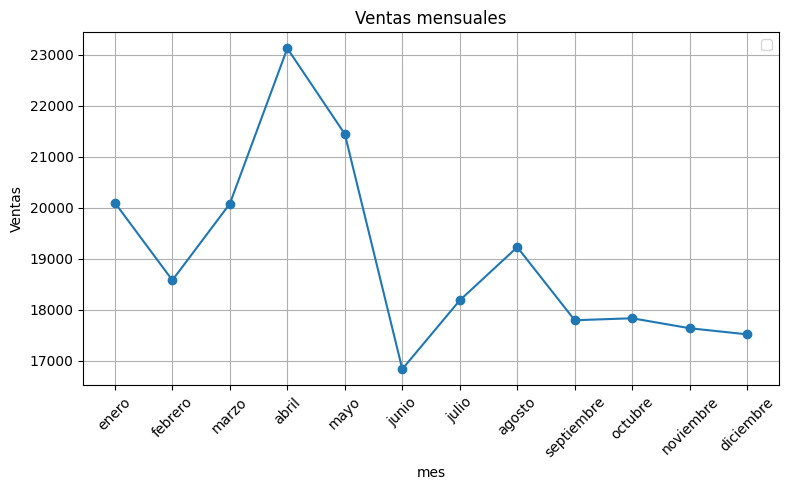

In [ ]:
plt.figure(figsize= (8,5))
plt.plot(ventasXmes.index.astype(str), ventasXmes.values, marker='o') #Error: plt.plot(ventasXmes['mes'].astype(str), ventasXmes['precio_venta'], label= 'Ventas mensuales')
plt.legend()
plt.title('Ventas mensuales')
plt.xlabel('mes')
plt.ylabel('Ventas')
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

De este grafico se observa un pico de ventas en abril de este año de ventas, mientras que el mes con menor ventas fue en junio.

-------------------------------------------------------

Grafico de Barras

Con este grafico analizaré, en este caso, las ventas totales por categoria, para lo cual deberé primero crear un agrupamiento de estos mediante -groupby-

In [ ]:
ventas_por_categoria= df_ventas.groupby('categoria', observed=False) ['precio_venta'].sum()
ventas_por_categoria

,precio_venta
categoria,
Decoración,74173.30139
Electrodomésticos,76520.96000
Electrónica,75179.71139


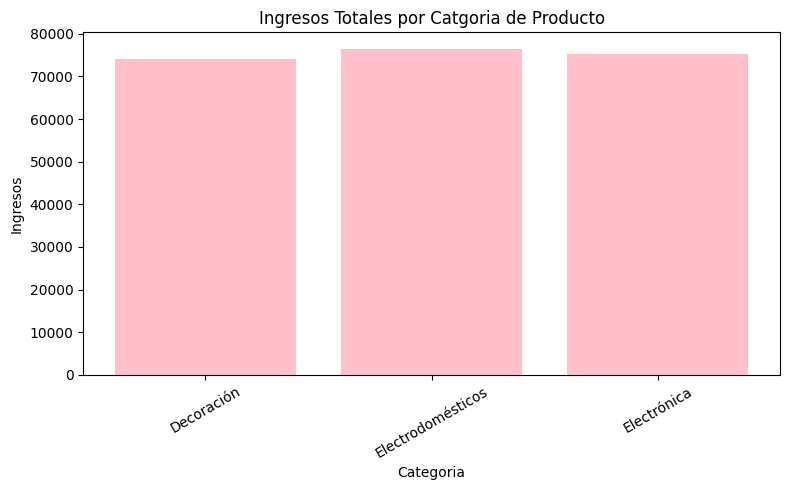

In [ ]:
plt.figure(figsize= (8,5))
plt.bar(ventas_por_categoria.index, ventas_por_categoria.values, color='pink')
plt.title('Ingresos Totales por Catgoria de Producto')
plt.xlabel('Categoria')
plt.ylabel('Ingresos')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Se observa una ligera predominancia de ingresos totales para la categoría 'Electrodomesticos' para este año de ventas.

--------------------------------------------------------

Grafico de Dispersion

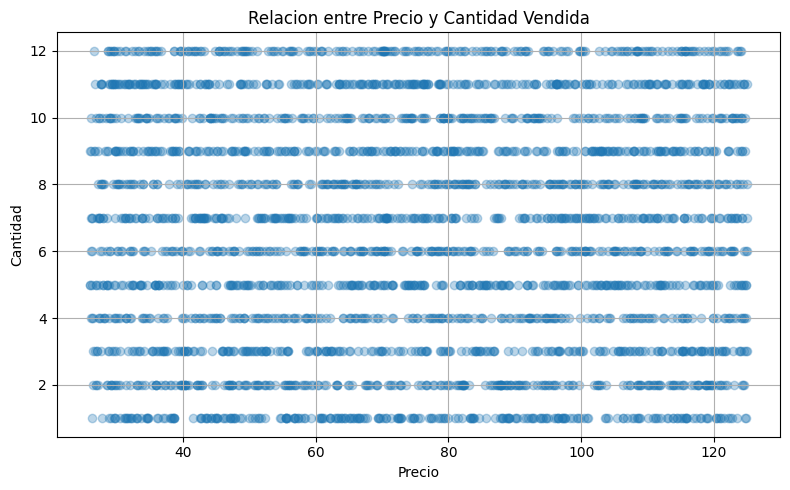

In [ ]:
plt.figure(figsize= (8,5))
plt.scatter(df_ventas['precio_venta'], df_ventas['cantidad'], alpha=0.3)
plt.title('Relacion entre Precio y Cantidad Vendida')
plt.xlabel('Precio')
plt.ylabel('Cantidad')
plt.grid()
plt.tight_layout()
plt.show()

Si bien, en principio no se puede inferir con seguridad alguna relacion (ya conocida por analisis de la matriz), se observará mejor este vinculo al visualizarlo con Seaborn...

##2) Visualizacion con Seaborn

In [ ]:
import seaborn as sns

Boxplot

<function matplotlib.pyplot.show(close=None, block=None)>

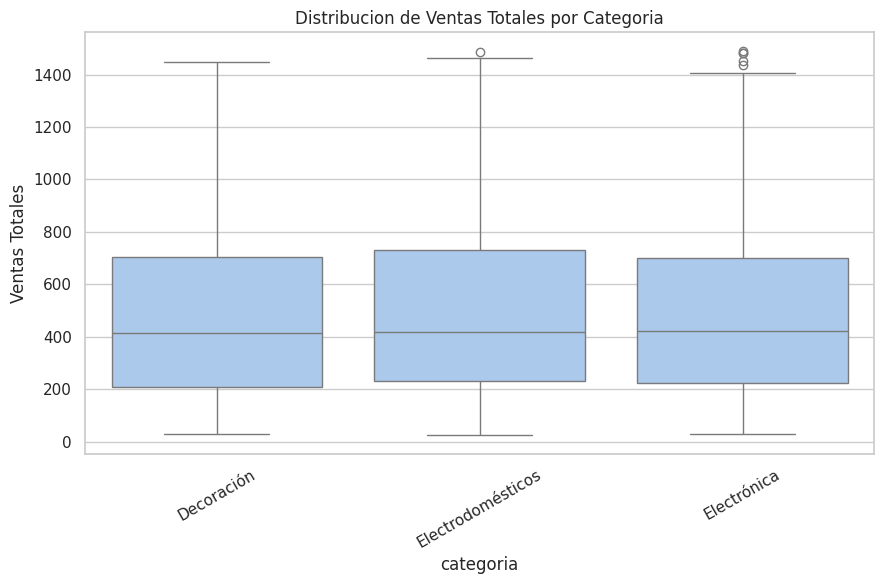

In [ ]:
sns.set(style='whitegrid', palette = 'pastel')

plt.figure(figsize=(9,6))
sns.boxplot(x='categoria', y='ventas_totales', data=df_ventas)
plt.title('Distribucion de Ventas Totales por Categoria')
#plt.xlabel('Categoria')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show

De igual manera que en el grafico de barras de Ingresos totales por Producto ya se había visto que la categoria con mayor ingresos totales era 'Electrodomesticos', en este boxplot se observa esa misma (ligera) predominancia para esta categoría en las Ventas totales.

Ademas, se observa una mayor presencia de datos atipicos (u outliers), asociados a un pequeño numero de operaciones con un alto valor de venta, para la distribucion de ventas totales para la categoría 'Electrónica'.

--------------------------------------------------------

Heatmap

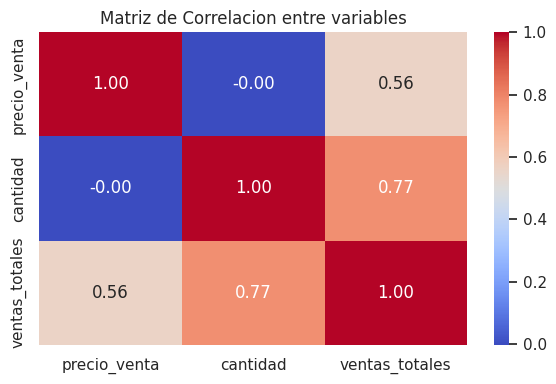

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt = ".2f")
plt.title('Matriz de Correlacion entre variables')
plt.tight_layout()
plt.show()

En este grafico se evidencia mas fuertemente lo analizado anteriormente en la matriz de correlacion. Pues es posible observar la asociacion positiva entre las ventas totales y la cantidad vendida, y en menor medida el vinculo entre las mismas y el precio por producto, mientras que no se observa una relacion precio-cantidad.
Esto indica que, para este año de ventas, cuando el precio sube las ventas totales tambien tienden a subir.

Violin plot

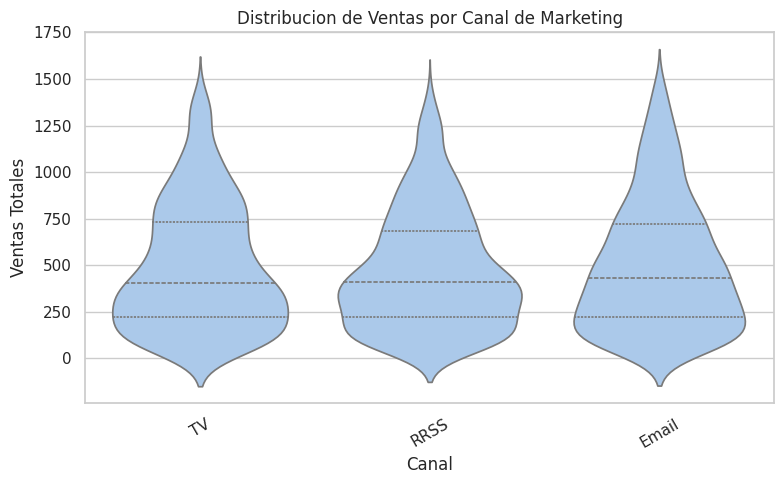

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x='canal', y='ventas_totales', data=df_combinado, inner='quartile')
plt.title('Distribucion de Ventas por Canal de Marketing')
plt.xlabel('Canal')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

De aca se oberva que los canales TV, RRSS y Email muestran distribuciones amplias y con valores relativamente similares. Se observó que las ventas totales promedio para los tres canales se dio en valores de venta total cercanos a ARS 250.

Ademas, se observó que las ventas por Email tuvieron el maximo valor de venta por operacion.

##3) Visualizacion con Plotly

In [ ]:
import plotly.express as px

Grafico de lineas con Plotly

In [ ]:
fig1= px.line(
    ventasXmes,
    x= ventasXmes.index.astype(str),
    y= ventasXmes.values,
    title= 'Evolucion total de Ventas',
    markers=True
)

fig1.update_layout(xaxis_title='Mes', yaxis_title='Ventas Totales')
fig1.show()

--------------------------------------------------------

Grafico de barras con Plotly

In [ ]:
fig2= px.bar(
    ventas_por_categoria,
    x=ventas_por_categoria.index,
    y=ventas_por_categoria.values,
    title='Ingresos Totales por Categoria',
    color=ventas_por_categoria.index
)

fig2.update_layout(xaxis_title='categoria', yaxis_title='ingresos')
fig2.show()

--------------------------------------------------------

Grafico de Dispersion con Plotly

In [ ]:
ventas_plot= df_combinado.dropna(subset=['precio_venta', 'cantidad', 'ventas_totales', 'canal'])

fig3 =px.scatter(
    ventas_plot,
    x='precio_venta',
    y='cantidad',
    size='ventas_totales',
    color='canal',
    hover_data=['producto'],
    title= 'Relacion Precio - Cantidad (segmentado por Canal)'
)

fig3.update_layout(xaxis_title='Precio', yaxis_title='Cantidad vendida')
fig3.show()

Tal como se advirtió previamente, en este grafico se observa la clara relacion positiva entre el precio y la cantidad vendida, con predominancia de estas via Email para valores altos.

**Conclusion**
> De lo analizado en este trabajo, se puede concluir que este año de ventas fue variado y fructifero, con un pico en abril y un valle en junio, y un valor promedio de venta por operacion cercano a ARS500, siendo el producto 'Cuadro decorativo' quien lideró la tabla.

> Por otra parte, se observó un aumento de cantidad de ventas ligado a un aumento del precio por producto, con predominancia de canal via Email para operaciones de alto valor de compra, y con la categoría 'Electrodomesticos' posicionandose como la categoría con mayor ingresos totales.





#**Anexo**

*   [Documentación de Numpy](https://numpy.org/doc/2.3/user/basics.html)

*   [Documentación de Pandas](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)





